# `02-pandas3.ipynb`

# 시계열 (Time Series) 데이터

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 다양한 날짜 형식 데이터 변환 시도
date_strings = [
    '2025년8월6일',
    '2023-01-15',
    '15/01/2023', 
    'Jan 15, 2023',
    '2023.01.15',
    '15-Jan-2023',
    '20230115',
]

for date in date_strings:
    # 예외 처리 (에러 처리)
    try:  # 일단 아래 블럭 실행. 되면 좋고,
        parsed = pd.to_datetime(date)
        print(f'{date} -> {parsed}')
    except:  # 안되면 에러 내지 말고, 아래 코드 실행.
        print(date, 'does not work')

2025년8월6일 does not work
2023-01-15 -> 2023-01-15 00:00:00
15/01/2023 -> 2023-01-15 00:00:00
Jan 15, 2023 -> 2023-01-15 00:00:00
2023.01.15 -> 2023-01-15 00:00:00
15-Jan-2023 -> 2023-01-15 00:00:00
20230115 -> 2023-01-15 00:00:00


In [3]:
# 시계열 인덱스 생성
# 날짜 범위 생성
dates_daily = pd.date_range('2023-01-01', '2023-12-31', freq='D')
dates_monthly = pd.date_range('2023-01-01', '2023-12-31', freq='ME')
dates_weekly = pd.date_range('2023-01-01', '2023-12-31', freq='W')

print(f"\n일별 날짜 (총 {len(dates_daily)}개): {dates_daily[:5].tolist()}...")
print(f"월별 날짜 (총 {len(dates_monthly)}개): {dates_monthly.tolist()}")
print(f"주별 날짜 (총 {len(dates_weekly)}개): {dates_weekly[:5].tolist()}...")

# 시계열 데이터프레임 생성
np.random.seed(42)

# 일별 매출 데이터 생성
daily_sales = pd.DataFrame({
    'date': dates_daily,
    'sales': np.random.normal(100000, 20000, len(dates_daily)) + 
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 7) * 10000 +  # 주간 패턴
             np.sin(np.arange(len(dates_daily)) * 2 * np.pi / 365) * 30000   # 연간 패턴
})

# 음수 값 제거
daily_sales['sales'] = daily_sales['sales'].clip(lower=10000)

# date를 인덱스로 설정
daily_sales.set_index('date', inplace=True)

print("\n일별 매출 데이터:")
print(daily_sales.head())


일별 날짜 (총 365개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-02 00:00:00'), Timestamp('2023-01-03 00:00:00'), Timestamp('2023-01-04 00:00:00'), Timestamp('2023-01-05 00:00:00')]...
월별 날짜 (총 12개): [Timestamp('2023-01-31 00:00:00'), Timestamp('2023-02-28 00:00:00'), Timestamp('2023-03-31 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-31 00:00:00'), Timestamp('2023-06-30 00:00:00'), Timestamp('2023-07-31 00:00:00'), Timestamp('2023-08-31 00:00:00'), Timestamp('2023-09-30 00:00:00'), Timestamp('2023-10-31 00:00:00'), Timestamp('2023-11-30 00:00:00'), Timestamp('2023-12-31 00:00:00')]
주별 날짜 (총 53개): [Timestamp('2023-01-01 00:00:00'), Timestamp('2023-01-08 00:00:00'), Timestamp('2023-01-15 00:00:00'), Timestamp('2023-01-22 00:00:00'), Timestamp('2023-01-29 00:00:00')]...

일별 매출 데이터:
                    sales
date                     
2023-01-01  109934.283060
2023-01-02  105569.429486
2023-01-03  123735.698233
2023-01-04  136348.024536
2023-01-05   93042.167918


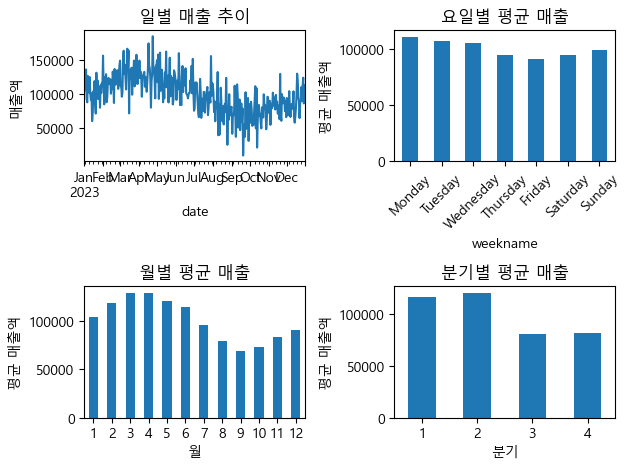

In [4]:
# Index (datetime index 라서 바로 접근)
daily_sales['year'] = daily_sales.index.year  # 년
daily_sales['month'] = daily_sales.index.month  # 월
daily_sales['day'] = daily_sales.index.day  # 일
daily_sales['weekday'] = daily_sales.index.weekday  # 요일, 월 == 0
daily_sales['weekname'] = daily_sales.index.day_name()  # 요일, 이것만 함수
daily_sales['quarter'] = daily_sales.index.quarter  # 분기

daily_sales.head()

# 요일별 평균 매출
weekday_avg = daily_sales.groupby('weekname')['sales'].mean()
# 원하는 순서 Series 나 DF 인덱스의 순서 바꾸기
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_avg = weekday_avg.reindex(weekday_order)

# 시각화
# 일별 매출 추이
plt.Figure(figsize=(12,8))
plt.subplot(2, 2, 1)
daily_sales['sales'].plot()
plt.title('일별 매출 추이')
plt.ylabel('매출액')

# 요일별 평균 매출
plt.subplot(2, 2, 2)
weekday_avg.plot(kind='bar')
plt.title('요일별 평균 매출')
plt.ylabel('평균 매출액')
plt.xticks(rotation=45)

# 월별 평균 매출
plt.subplot(2, 2, 3)
monthly_avg = daily_sales.groupby('month')['sales'].mean()
monthly_avg.plot(kind='bar')
plt.title('월별 평균 매출')
plt.xlabel('월')
plt.ylabel('평균 매출액')
plt.xticks(rotation=0)

# 분기별 평균 매출
plt.subplot(2, 2, 4)
quarter_avg = daily_sales.groupby('quarter')['sales'].mean()
quarter_avg.plot(kind='bar')
plt.title('분기별 평균 매출')
plt.xlabel('분기')
plt.ylabel('평균 매출액')
plt.xticks(rotation=0)

# Layout 겹치지 않게 조정
plt.tight_layout()
plt.show()

In [5]:
# 인덱싱 및 슬라이싱
f'전체 데이터 기간, {daily_sales.index.min()} ~ {daily_sales.index.max()}'

'전체 데이터 기간, 2023-01-01 00:00:00 ~ 2023-12-31 00:00:00'

In [6]:
# 특정 날짜 선택
d1 = daily_sales.loc['2023-01-15']
d1['sales']

np.float64(72661.82632991784)

In [7]:
# 날짜 범위 선택
jan_half = daily_sales['2023-01-01': '2023-01-15']
# 데이터 개수, 매출 총합
len(jan_half), jan_half['sales'].sum()

(15, np.float64(1557048.692157083))

In [8]:
# 부분 문자열 활용
daily_sales.loc['2023-04']

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-04-01,124116.291222,2023,4,1,5,Saturday,2
2023-04-02,149372.622003,2023,4,2,6,Sunday,2
2023-04-03,123774.752707,2023,4,3,0,Monday,2
2023-04-04,133182.424610,2023,4,4,1,Tuesday,2
2023-04-05,126463.065796,2023,4,5,2,Wednesday,2
2023-04-06,96328.378472,2023,4,6,3,Thursday,2
2023-04-07,126072.893472,2023,4,7,4,Friday,2
2023-04-08,127255.949952,2023,4,8,5,Saturday,2
2023-04-09,129899.974611,2023,4,9,6,Sunday,2


In [9]:
# 조건부 필터링 (weekname 컬럼이 Friday)
daily_sales[daily_sales['weekname'] == 'Friday']

# 특정 월의 주말만 (6월)
# 6월 데이터만 뽑기
june = daily_sales.loc['2023-06']
# 토/일 만 True mask
weekend_mask = daily_sales.loc['2023-06']['weekday'].isin([5, 6])  # 0==월

june[weekend_mask]

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-06-03,111414.940332,2023,6,3,5,Saturday,2
2023-06-04,119996.234696,2023,6,4,6,Sunday,2
2023-06-10,84019.290727,2023,6,10,5,Saturday,2
2023-06-11,126593.103997,2023,6,11,6,Sunday,2
2023-06-17,138027.509610,2023,6,17,5,Saturday,2
2023-06-18,102502.903094,2023,6,18,6,Sunday,2
2023-06-24,102089.477070,2023,6,24,5,Saturday,2
2023-06-25,120406.110304,2023,6,25,6,Sunday,2


In [10]:
# 마지막 10일간의 데이터
daily_sales.tail(10)

,sales,year,month,day,weekday,weekname,quarter
date,,,,,,,
2023-12-22,65061.339260,2023,12,22,4,Friday,4
2023-12-23,87182.157836,2023,12,23,5,Saturday,4
2023-12-24,90108.464058,2023,12,24,6,Sunday,4
2023-12-25,110666.444684,2023,12,25,0,Monday,4
2023-12-26,90111.609327,2023,12,26,1,Tuesday,4
2023-12-27,112146.823714,2023,12,27,2,Wednesday,4
2023-12-28,124251.868065,2023,12,28,3,Thursday,4
2023-12-29,86526.927892,2023,12,29,4,Friday,4
2023-12-30,99183.271269,2023,12,30,5,Saturday,4


[109934.28306022 105569.42948593 123735.69823251 136348.02453603
  93042.16791843  88146.92570132 126858.99240889 118954.93593004
 102547.19026938 125229.74461347 100209.27786037  91993.36883272
 101243.10130556  60573.72567229  72661.82632992 104233.16309335
  97651.40144115 119278.2570295   86648.31783809  71642.73670225
 131620.34754157 106094.75765556 120260.61520516  92824.21758486
 105495.82257685 110395.42248139  80214.11710625 113142.52579445
 101893.73432871 116346.45503229 112528.41338203]


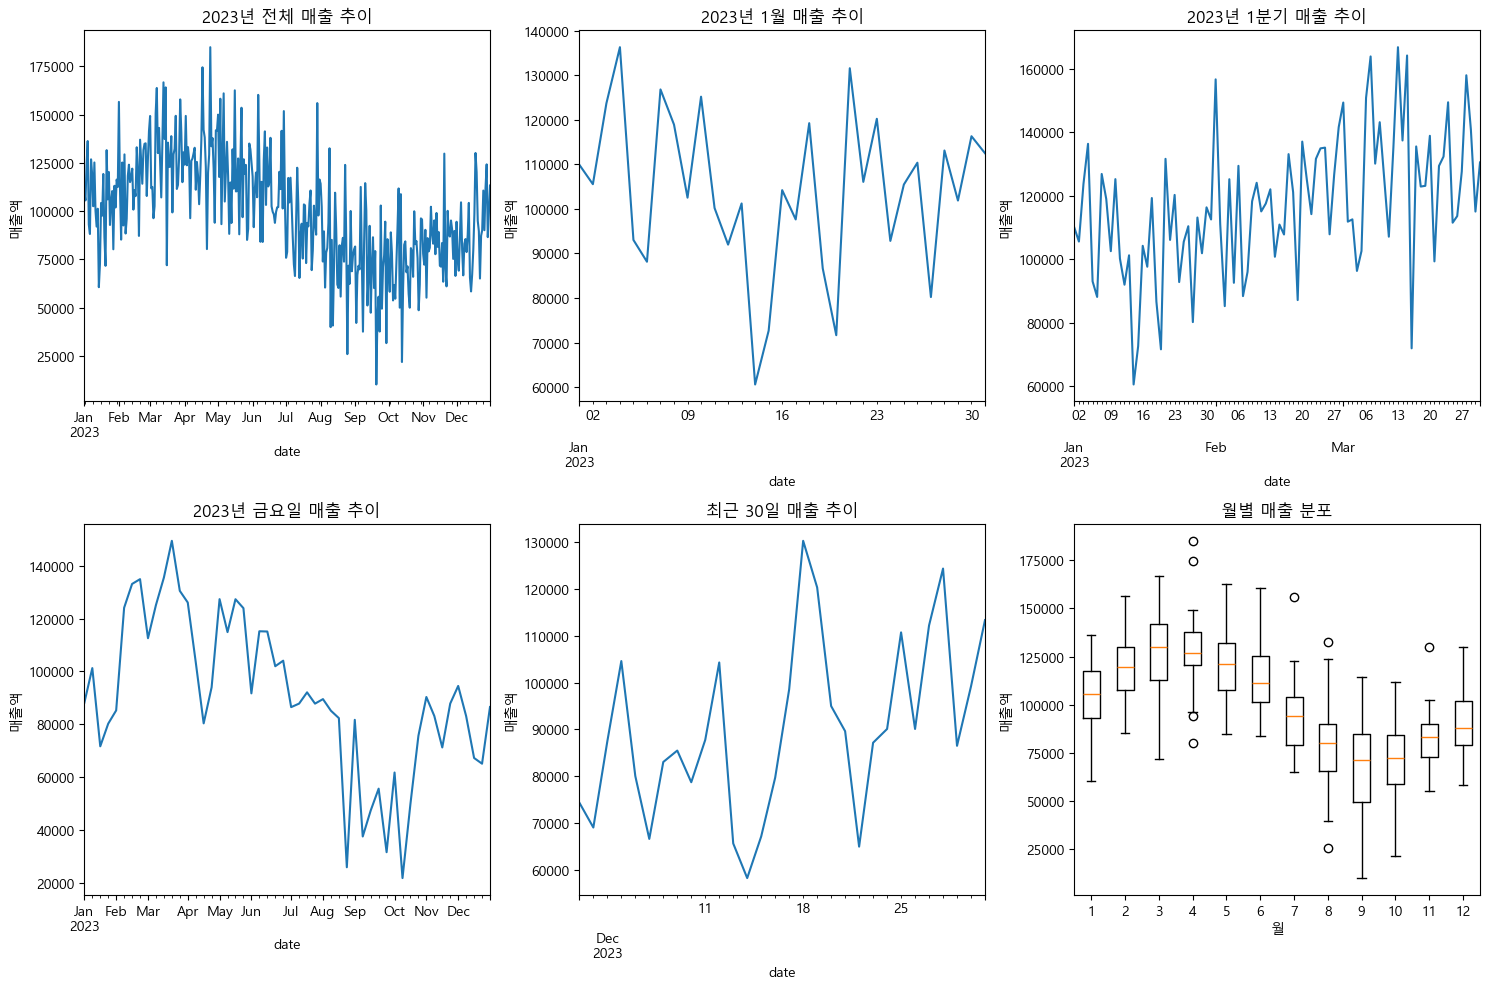

In [11]:
# 시각화
plt.figure(figsize=(15, 10))

# 전체 날짜-매출 데이터
plt.subplot(2, 3, 1)
daily_sales['sales'].plot()
plt.title('2023년 전체 매출 추이')
plt.ylabel('매출액')

# 1월 데이터
plt.subplot(2, 3, 2)
jan_data = daily_sales.loc['2023-01']
jan_data['sales'].plot()
plt.title('2023년 1월 매출 추이')
plt.ylabel('매출액')

# 1Q 데이터
plt.subplot(2, 3, 3)
q1_data = daily_sales[daily_sales['quarter'] == 1]
q1_data['sales'].plot()
plt.title('2023년 1분기 매출 추이')
plt.ylabel('매출액')

# 금요일 매출 추이
plt.subplot(2, 3, 4)
friday_data = daily_sales[daily_sales['weekday'] == 4]
friday_data['sales'].plot()
plt.title('2023년 금요일 매출 추이')
plt.ylabel('매출액')

# 최근 30일
plt.subplot(2, 3, 5)
last30days_data = daily_sales.tail(30)
last30days_data['sales'].plot()
plt.title('최근 30일 매출 추이')
plt.ylabel('매출액')

# 월별 박스 플롯?
plt.subplot(2, 3, 6)
print(daily_sales[daily_sales['month'] == 1]['sales'].values)

all_months = [daily_sales[daily_sales['month'] == m]['sales'].values for m in range(1, 13)]

plt.boxplot(all_months)
plt.title('월별 매출 분포')
plt.xlabel('월')
plt.ylabel('매출액')


plt.tight_layout()
plt.show()

In [12]:
%pip install -q statsmodels

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 시계열 데이터 추세,, 계절성 분해 함수
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
# 월 기준으로 리샘플링
daily_sales.resample('ME')['sales'].mean()

date
2023-01-31    104107.064418
2023-02-28    117734.578352
2023-03-31    128912.491972
2023-04-30    128234.072429
2023-05-31    120658.587866
2023-06-30    113914.972247
2023-07-31     95139.246890
2023-08-31     79330.974225
2023-09-30     69078.105530
2023-10-31     73108.426146
2023-11-30     83359.306665
2023-12-31     90306.009649
Freq: ME, Name: sales, dtype: float64

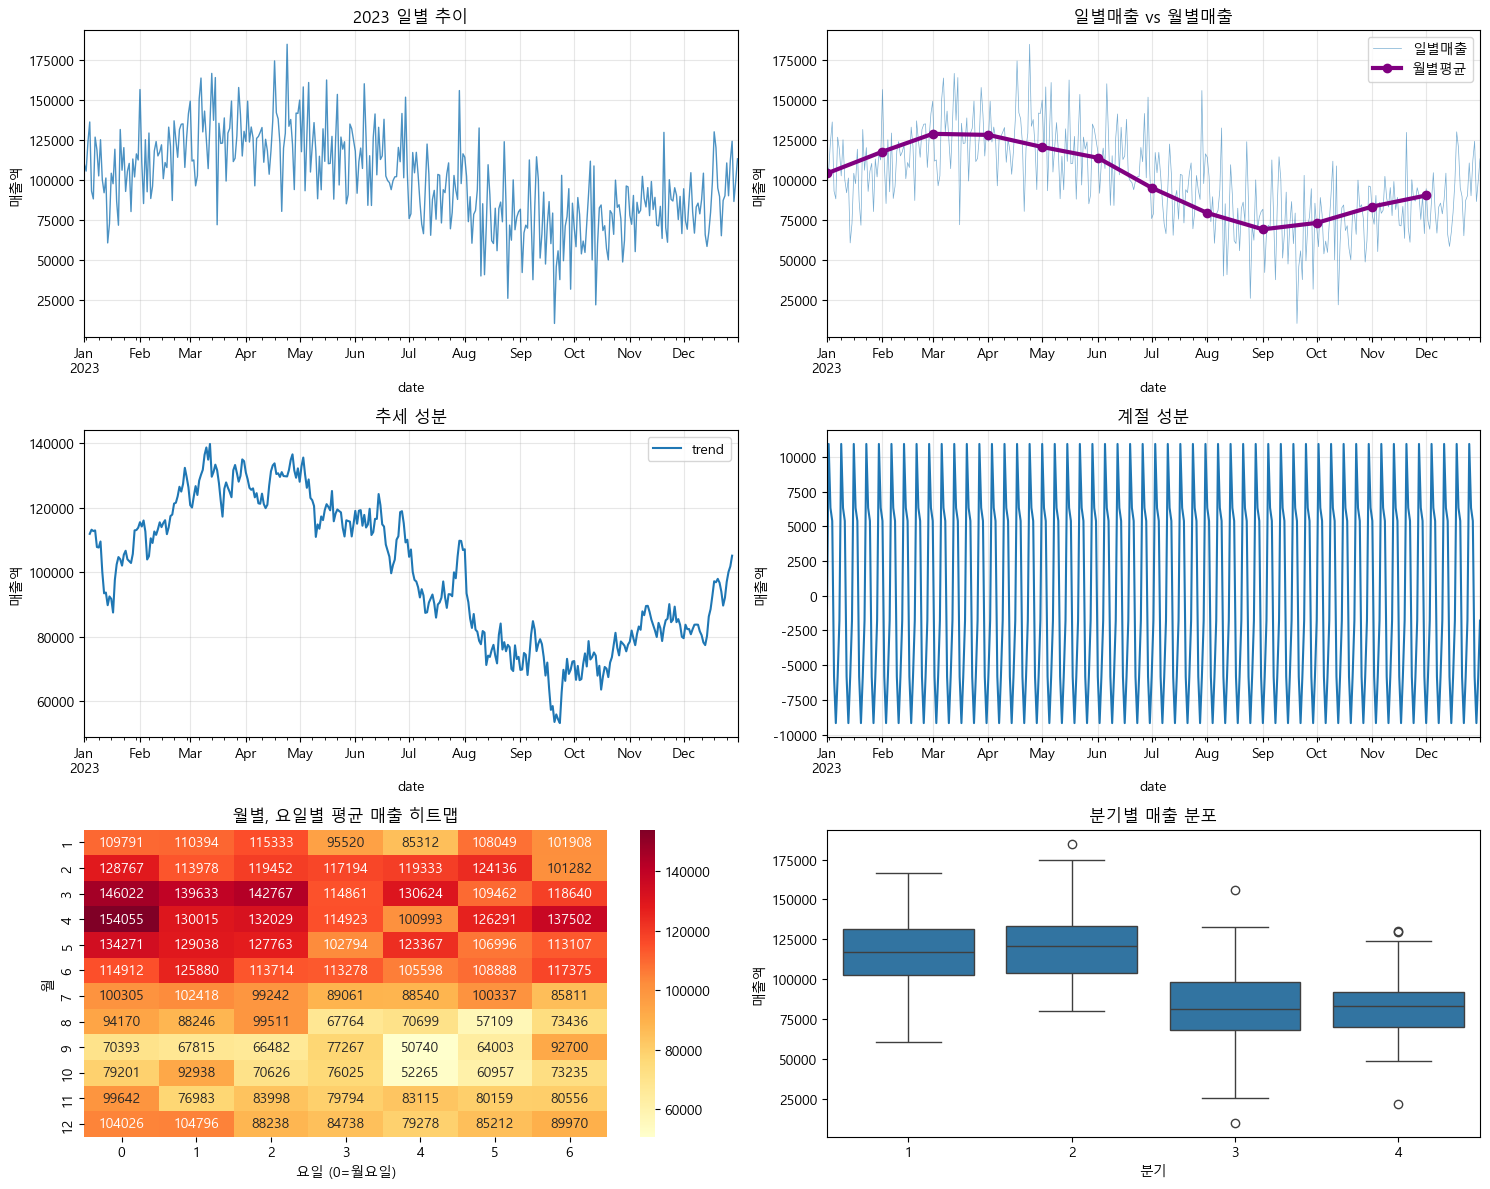

In [15]:
plt.figure(figsize=(15, 12))

# 전체 추이
plt.subplot(3, 2, 1)
daily_sales['sales'].plot(linewidth=1, alpha=0.8)  # 두께, 투명도
plt.grid(True, alpha=0.3)  # 보조선
plt.title('2023 일별 추이')
plt.ylabel('매출액')

# 월별 평균 같이 보기
plt.subplot(3, 2, 2)
daily_sales['sales'].plot(linewidth=0.5, alpha=0.6, label='일별매출')
# 일단위 -> 월단위 간격 재조정 후 평균내기
monthly_avg = daily_sales.resample('ME')['sales'].mean()
monthly_avg.plot(linewidth=3, marker='o', label='월별평균', color='purple')

plt.title('일별매출 vs 월별매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)
plt.legend()  # 범례

# 시계열 분해 (Seasonal Decomposition)
# Trend(추세) -> 전반적인 방향성 (증가/감소)
# Seasonal(주기적 반복) -> 주기적으로 반복되는 패턴 (매주 금요일 매출 증가)
# Residual(잔차) -> 추세/계절성을 제거한 나머지 요인(갑작스런 이벤트, 노이즈)
decomp = seasonal_decompose(daily_sales['sales'], model='additive', period=7)  # 덧셈모델, 주간패턴

# 7일 이동평균으로 트렌드 확인
plt.subplot(3, 2, 3)
decomp.trend.plot()
plt.title('추세 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)
plt.legend()  # 범례

# 7일 이동평균으로 계절성 확인
plt.subplot(3, 2, 4)
decomp.seasonal.plot()
plt.title('계절 성분')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

# 히트맵(Heatmap) - 월별, 요일별
plt.subplot(3, 2, 5)
pt = daily_sales.pivot_table(
    values='sales',
    index='month',
    columns='weekday',
    aggfunc='mean'
)
# annot=히트맵 숫자 표시, fmt=숫자 형식, cmap=컬러맵 색깔
sns.heatmap(pt, annot=True, fmt='.0f', cmap='YlOrRd')
plt.title('월별, 요일별 평균 매출 히트맵')
plt.xlabel('요일 (0=월요일)')
plt.ylabel('월')

# 분기별 박스플롯
plt.subplot(3, 2, 6)
sns.boxplot(x='quarter', y='sales', data=daily_sales)
plt.title('분기별 매출 분포')
plt.xlabel('분기')
plt.ylabel('매출액')

plt.tight_layout()
plt.show()

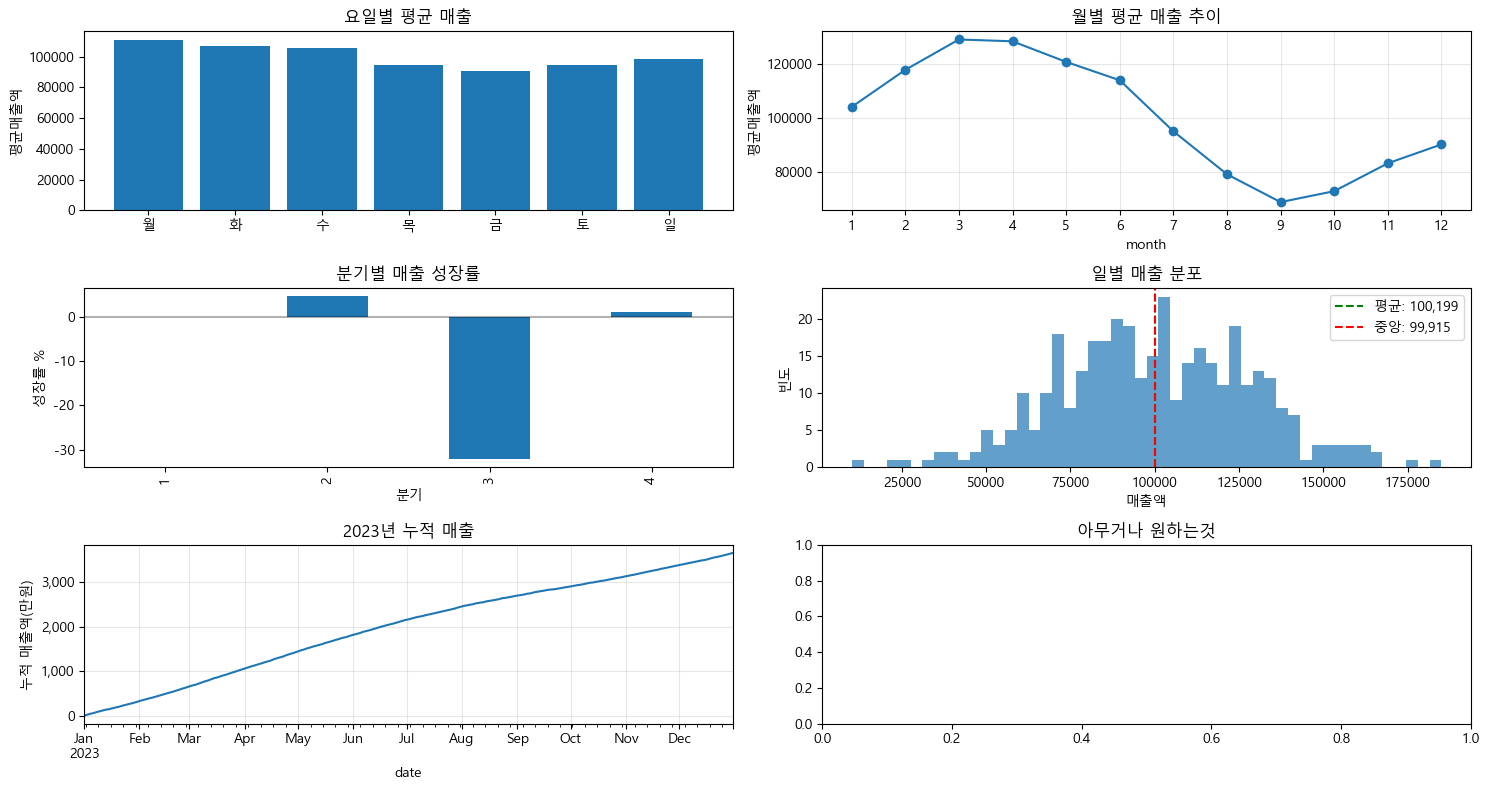

In [16]:
plt.figure(figsize=(15, 8))


# 주간 패턴
plt.subplot(3, 2, 1)
weekday_pattern = daily_sales.groupby('weekday')['sales'].mean()
weekday_names = list('월화수목금토일')
plt.bar(range(7), weekday_pattern.values)
plt.xticks(range(7), weekday_names)
plt.title('요일별 평균 매출')
plt.ylabel('평균매출액')


# 월별 패턴
plt.subplot(3, 2, 2)
monthly_pattern = daily_sales.groupby('month')['sales'].mean()
# X축 기본 세팅 -> month는 정수라 2간격
monthly_pattern.plot(marker='o')
plt.xticks(range(1, 13))
# 정수 데이터에서 X축을 명확하게 지정
# plt.plot(monthly_pattern.index, monthly_pattern.values, marker='o')
plt.title('월별 평균 매출 추이')
plt.ylabel('평균매출액')
plt.grid(True, alpha=0.3)
'''
# Resampling 활용하는 방법
df = daily_sales.resample('ME')['sales'].mean()
df.plot()
'''


# 분기별 성장률 (.pct_change()) - 막대그래프
plt.subplot(3, 2, 3)
q_sales = daily_sales.groupby('quarter')['sales'].sum()
# 각 레코드별 증감률을 표시
q_growth = q_sales.pct_change() * 100
q_growth.plot(kind='bar')
plt.title('분기별 매출 성장률')
plt.xlabel('분기')
plt.ylabel('성장률 %')
# 기준선(0점) 표시 가로선
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)


# 매출 분포 히스토그램 (optional)
plt.subplot(3, 2, 4)
plt.hist(daily_sales['sales'], bins=50, alpha=0.7)  # bins=50
plt.title('일별 매출 분포')
# 평균 세로선
sales_avg = daily_sales['sales'].mean()
plt.axvline(sales_avg, color='green', linestyle='--',  label=f'평균: {sales_avg:,.0f}')  # 3자리, + 소수점 X
# 중앙값 세로선
sales_med = daily_sales['sales'].median()
plt.axvline(sales_avg, color='red', linestyle='--',  label=f'중앙: {sales_med:,.0f}')
plt.xlabel('매출액')
plt.ylabel('빈도')
plt.legend()  # 범례표시


# 2023 누적 매출 (.cumsum())
plt.subplot(3, 2, 5)
# 매출 누적 Series
daily_sales['cum_sales'] = daily_sales['sales'].cumsum()
daily_sales['cum_sales'].plot()
plt.title('2023년 누적 매출')
plt.ylabel('누적 매출액(만원)')
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/10000:,.0f}')  # 들어온 숫자를 10000으로 나누고, ',' 찍고 소수점 없애기
plt.gca().yaxis.set_major_formatter(formatter)
plt.grid(True, alpha=0.3)

# 자유도
plt.subplot(3, 2, 6)

plt.title('아무거나 원하는것')

plt.tight_layout()
plt.show()

<Figure size 1500x800 with 0 Axes>

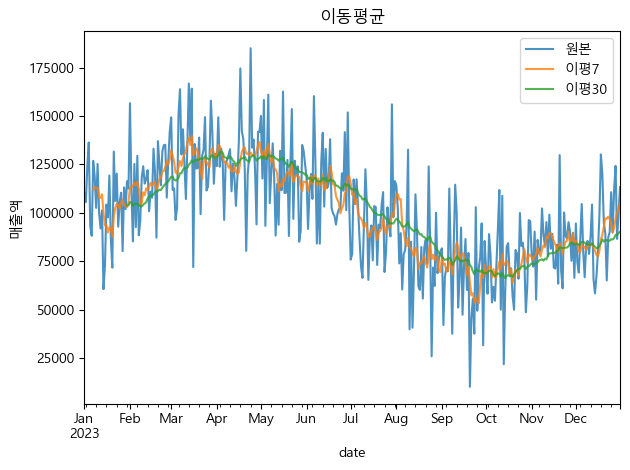

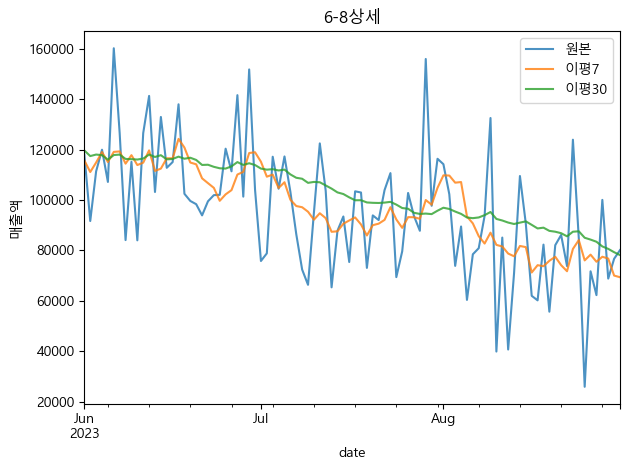

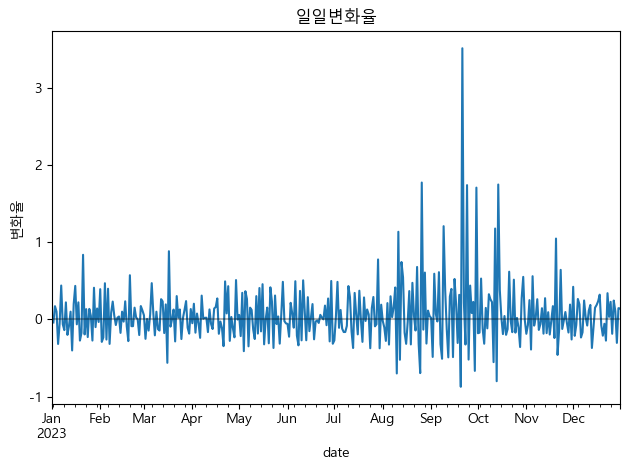

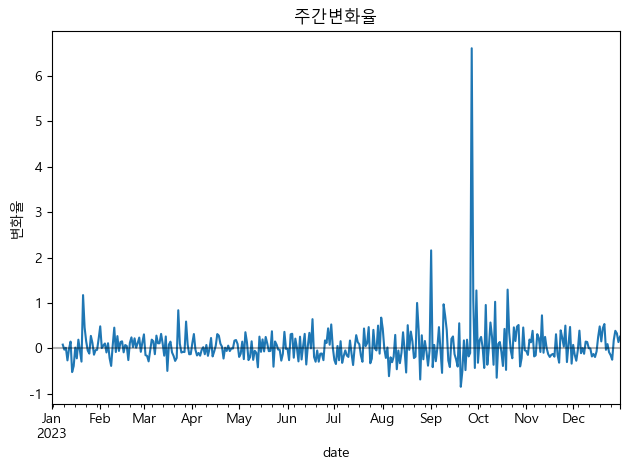

In [17]:
# 기본 시계열 연산
import matplotlib.pyplot as plt

# 시계열 데이터 연산
# 이동평균 7일
daily_sales['ma_7'] = daily_sales['sales'].rolling(window=7).mean()
daily_sales['ma_30'] = daily_sales['sales'].rolling(window=30).mean()


plt.figure(figsize=(15, 8))
# 이동평균 시각화
daily_sales[['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('이동평균')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])
plt.tight_layout()
plt.show()

# 특정기간 확대(6-8월)
daily_sales.loc['2023-06':'2023-08'][['sales', 'ma_7', 'ma_30']].plot(alpha=0.8)
plt.title('6-8상세')
plt.ylabel('매출액')
plt.legend(['원본', '이평7', '이평30'])
plt.tight_layout()
plt.show()

# 변화율 계산(pct_change)
daily_sales['daily_change'] = daily_sales['sales'].pct_change()
daily_sales['weekly_change'] = daily_sales['sales'].pct_change(periods=7)  # 주간변화율

# 일일변화율 시각화
daily_sales['daily_change'].plot()
plt.title('일일변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

# 주간변화율 시각화
daily_sales['weekly_change'].plot()
plt.title('주간변화율')
plt.ylabel('변화율')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

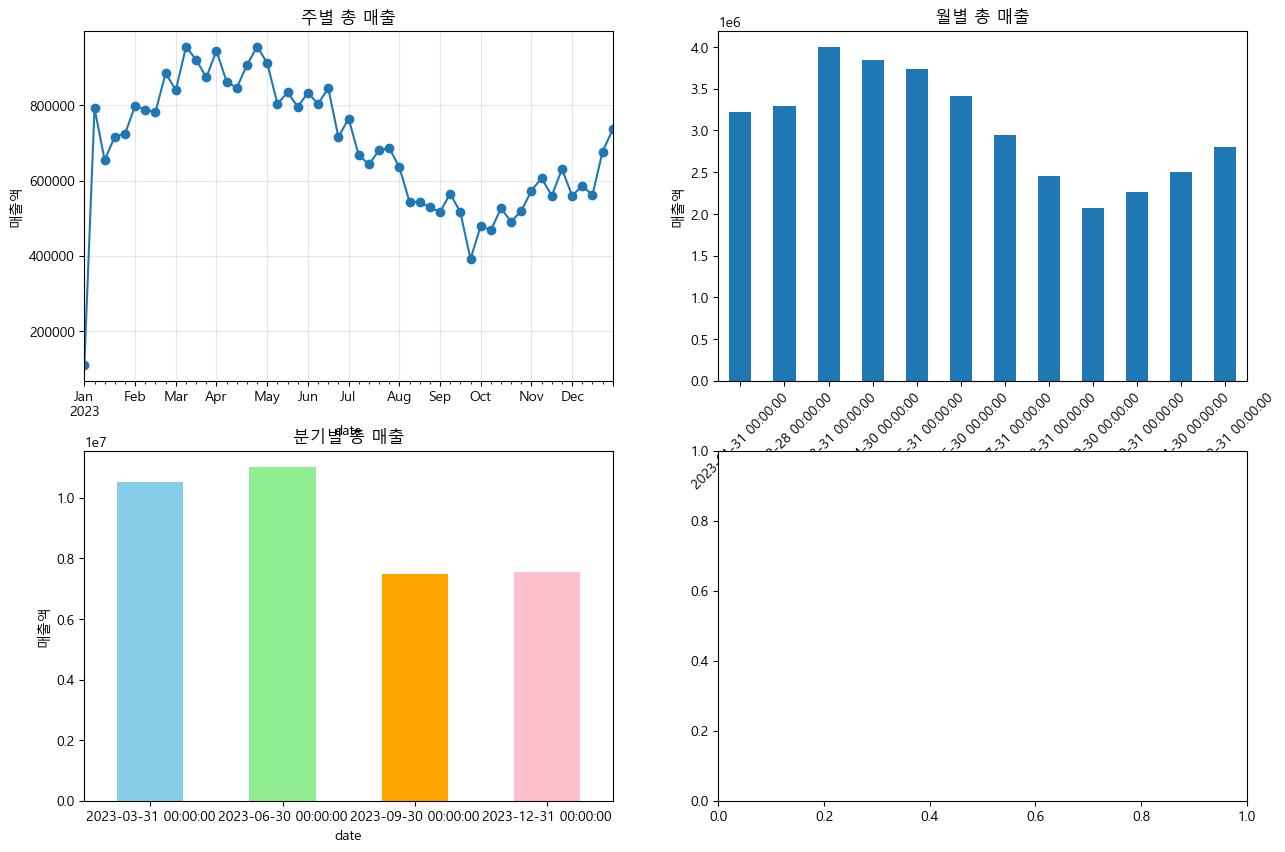

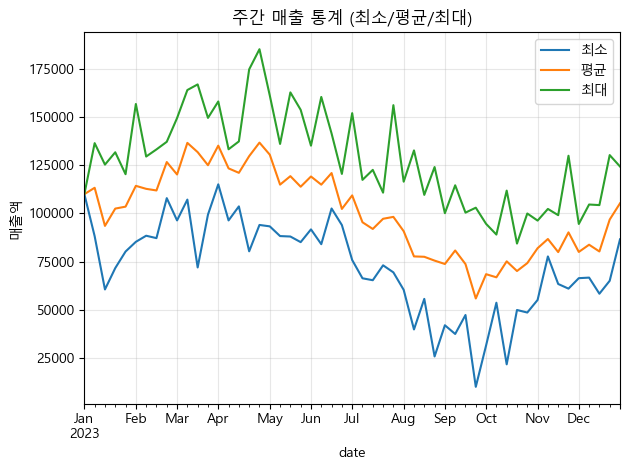

In [18]:
# 리샘플링 (원하는 주기로 나누어준다)

# 집계함수 적용 가능(사실상 그루핑)
weekly_stats = daily_sales['sales'].resample('W').agg(['sum', 'mean', 'min', 'max', 'std'])


# 주간 매출 총합
w_sales = daily_sales['sales'].resample('W').sum()
# 월간 매출 총합
m_sales = daily_sales['sales'].resample('ME').sum()  # 월 마지막날 기준 (MS)
# 분기 매출 총합
q_sales = daily_sales['sales'].resample('QE').sum()  # 분기 마지막날 기준 (QS)

# 6. 리샘플링 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
w_sales.plot(marker='o')
plt.title('주별 총 매출')
plt.ylabel('매출액')
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
m_sales.plot(kind='bar')
plt.title('월별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
q_sales.plot(kind='bar', color=['skyblue', 'lightgreen', 'orange', 'pink'])
plt.title('분기별 총 매출')
plt.ylabel('매출액')
plt.xticks(rotation=0)

plt.subplot(2, 2, 4)
weekly_stats[['min', 'mean', 'max']].plot()
plt.title('주간 매출 통계 (최소/평균/최대)')
plt.ylabel('매출액')
plt.legend(['최소', '평균', '최대'])
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [19]:
# 실습: 주식 데이터 시계열 분석 (시뮬레이션)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore', category=UserWarning)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 가상의 주식 데이터 생성
np.random.seed(42)

# 1년간의 일별 주식 데이터 생성
dates = pd.date_range('2023-01-01', '2023-12-31', freq='D')
n_days = len(dates)

# 주식 가격 시뮬레이션 (기하 브라운 운동)
initial_price = 100000  # 초기 가격
volatility = 0.02  # 일일 변동성
drift = 0.0005  # 일일 드리프트

# 가격 변화율 생성
returns = np.random.normal(drift, volatility, n_days)
returns[0] = 0  # 첫날은 변화 없음

# 누적곱으로 가격 계산
price_multipliers = (1 + returns).cumprod()
prices = initial_price * price_multipliers

# 거래량 생성 (가격 변동성과 반비례 관계)
base_volume = 1000000
volume = base_volume + np.random.normal(0, 200000, n_days) - np.abs(returns) * 5000000
volume = np.maximum(volume, 100000)  # 최소 거래량 보장

# 데이터프레임 생성
stock_data = pd.DataFrame({
    'date': dates,        # 날짜
    'close': prices,      # 종가
    'volume': volume,     # 거래량
    'returns': returns,   # 전날 대비 가격 변화율
})

stock_data.set_index('date', inplace=True)

# 고가, 저가, 시가 생성 (종가 기준)
# 시가를 기준으로 고가/저가를 생성
stock_data['open'] = stock_data['close'].shift(1) * (1 + np.random.normal(0, 0.005, n_days))
stock_data['open'].iloc[0] = initial_price

# 고가 = 시가보다 높은 값
stock_data['high'] = stock_data['open'] * (1 + np.abs(np.random.normal(0, 0.01, n_days)))

# 저가 = 시가보다 낮은 값
stock_data['low'] = stock_data['open'] * (1 - np.abs(np.random.normal(0, 0.01, n_days)))

C:\Users\amy\AppData\Local\Temp\ipykernel_18696\1006822034.py:50: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['open'].iloc[0] = initial_price


In [20]:
# 고가, 저가, 시가 생성 (종가 기준)
# 시가를 기준으로 고가/저가를 생성
stock_data['open'] = stock_data['close'].shift(1) * (1 + np.random.normal(0, 0.005, n_days))
stock_data['open'].iloc[0] = initial_price

# 고가 = 시가보다 높은 값
stock_data['high'] = stock_data['open'] * (1 + np.abs(np.random.normal(0, 0.01, n_days)))

# 저가 = 시가보다 낮은 값
stock_data['low'] = stock_data['open'] * (1 - np.abs(np.random.normal(0, 0.01, n_days)))

C:\Users\amy\AppData\Local\Temp\ipykernel_18696\1578880078.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  stock_data['open'].iloc[0] = initial_price


In [21]:
df = stock_data[['volume', 'open', 'close', 'high', 'low', 'returns']]

df['ma_20'] = df['close'].rolling(window=20).mean()  # 20일 이동평균
df['ma_60'] = df['close'].rolling(window=60).mean()  # 60일 이동평균

# 결측치 확인 -> 있으면 처리
stock_data.isna().sum()

# 첫 5일
df.head()

C:\Users\amy\AppData\Local\Temp\ipykernel_18696\1271107147.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_20'] = df['close'].rolling(window=20).mean()  # 20일 이동평균
C:\Users\amy\AppData\Local\Temp\ipykernel_18696\1271107147.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ma_60'] = df['close'].rolling(window=60).mean()  # 60일 이동평균


,volume,open,close,high,low,returns,ma_20,ma_60
date,,,,,,,,
2023-01-01,9.197559e+05,100000.000000,100000.000000,101598.124352,99465.370914,0.000000,NaN,NaN
2023-01-02,1.033492e+06,99454.800461,99773.471398,99914.453364,96833.422807,-0.002265,NaN,NaN
2023-01-03,9.352496e+05,100477.339505,101115.800810,102511.311958,100473.947886,0.013454,NaN,NaN
2023-01-04,8.647322e+05,101065.956720,104246.406382,102443.661570,100734.641116,0.030961,NaN,NaN
2023-01-05,8.244827e+05,104256.231409,103810.336628,104454.011911,103292.622194,-0.004183,NaN,NaN


C:\Users\amy\AppData\Local\Temp\ipykernel_18696\270786671.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['volatility'] = df['returns'].rolling(window=20).std() * np.sqrt(252)  #


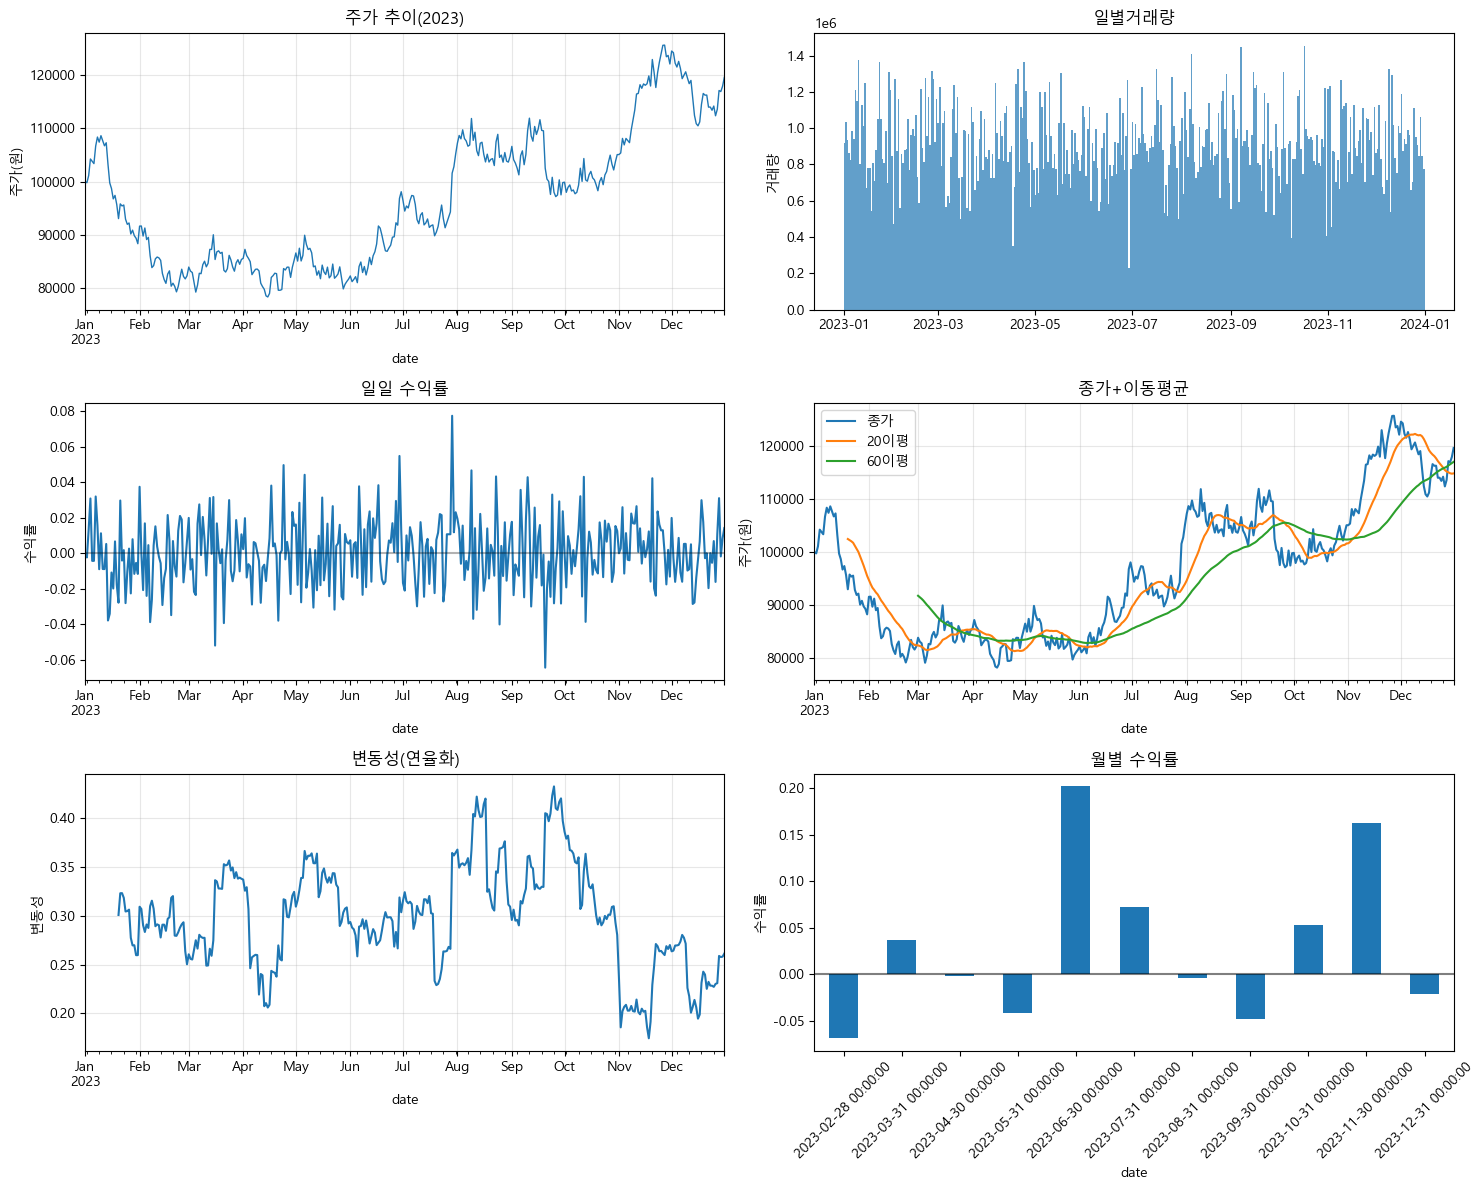

In [22]:
# 기본 주식 차트
plt.figure(figsize=(15, 12))

# 주가 추이
plt.subplot(3, 2, 1)
df['close'].plot(linewidth=1)
plt.title('주가 추이(2023)')
plt.ylabel('주가(원)')
plt.grid(True, alpha=0.3)

# 거래량
plt.subplot(3, 2, 2)
# bar,    x축    ,    y축
plt.bar(df.index, df['volume'], width=1, alpha=0.7)
plt.title('일별거래량')
plt.ylabel('거래량')

#  일일 수익률(returns)
plt.subplot(3, 2, 3)
df['returns'].plot()
plt.title('일일 수익률')
plt.ylabel('수익률')
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)

# 이동평균
plt.subplot(3, 2, 4)
ax = plt.gca()
df[['close', 'ma_20', 'ma_60']].plot(ax=ax)
plt.title('종가+이동평균')
plt.ylabel('주가(원)')
plt.legend(['종가', '20이평', '60이평'])
plt.grid(True, alpha=0.3)

# 변동성(Volatility)
plt.subplot(3, 2, 5)
df['volatility'] = df['returns'].rolling(window=20).std() * np.sqrt(252)  # 
df['volatility'].plot()
plt.title('변동성(연율화)')
plt.ylabel('변동성')
plt.grid(True, alpha=0.3)

# 월별 수익률
plt.subplot(3, 2, 6)
# 월말 기준 종가 변동률 (1월은 버림)
monthly_returns = df['close'].resample('ME').last().pct_change().dropna()
monthly_returns.plot(kind='bar')
plt.title('월별 수익률')
plt.ylabel('수익률')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)

plt.tight_layout()
plt.show()

In [23]:
# 기술적 지표 계산
# RSI (Relative Strength Index)
def calculate_rsi(prices: pd.Series, window=14):
    # 이전 데이터와의 수치 차이
    delta = prices.diff()
    gain = delta.where(delta > 0, 0).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi


# 볼링거 밴드
def calculate_bollinger_bands(prices: pd.Series, window=20, num_std=2):
    rolling_mean = prices.rolling(window=window).mean()
    rolling_std = prices.rolling(window=window).std()
    upper_band = rolling_mean + (rolling_std * num_std)
    lower_band = rolling_mean - (rolling_std * num_std)
    return upper_band, lower_band


df['rsi'] = calculate_rsi(stock_data['close'])

df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(stock_data['close'])

C:\Users\amy\AppData\Local\Temp\ipykernel_18696\2956043370.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rsi'] = calculate_rsi(stock_data['close'])
C:\Users\amy\AppData\Local\Temp\ipykernel_18696\2956043370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bb_upper'], df['bb_lower'] = calculate_bollinger_bands(stock_data['close'])
C:\Users\amy\AppData\Local\Temp\ipykernel_18696\2956043370.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

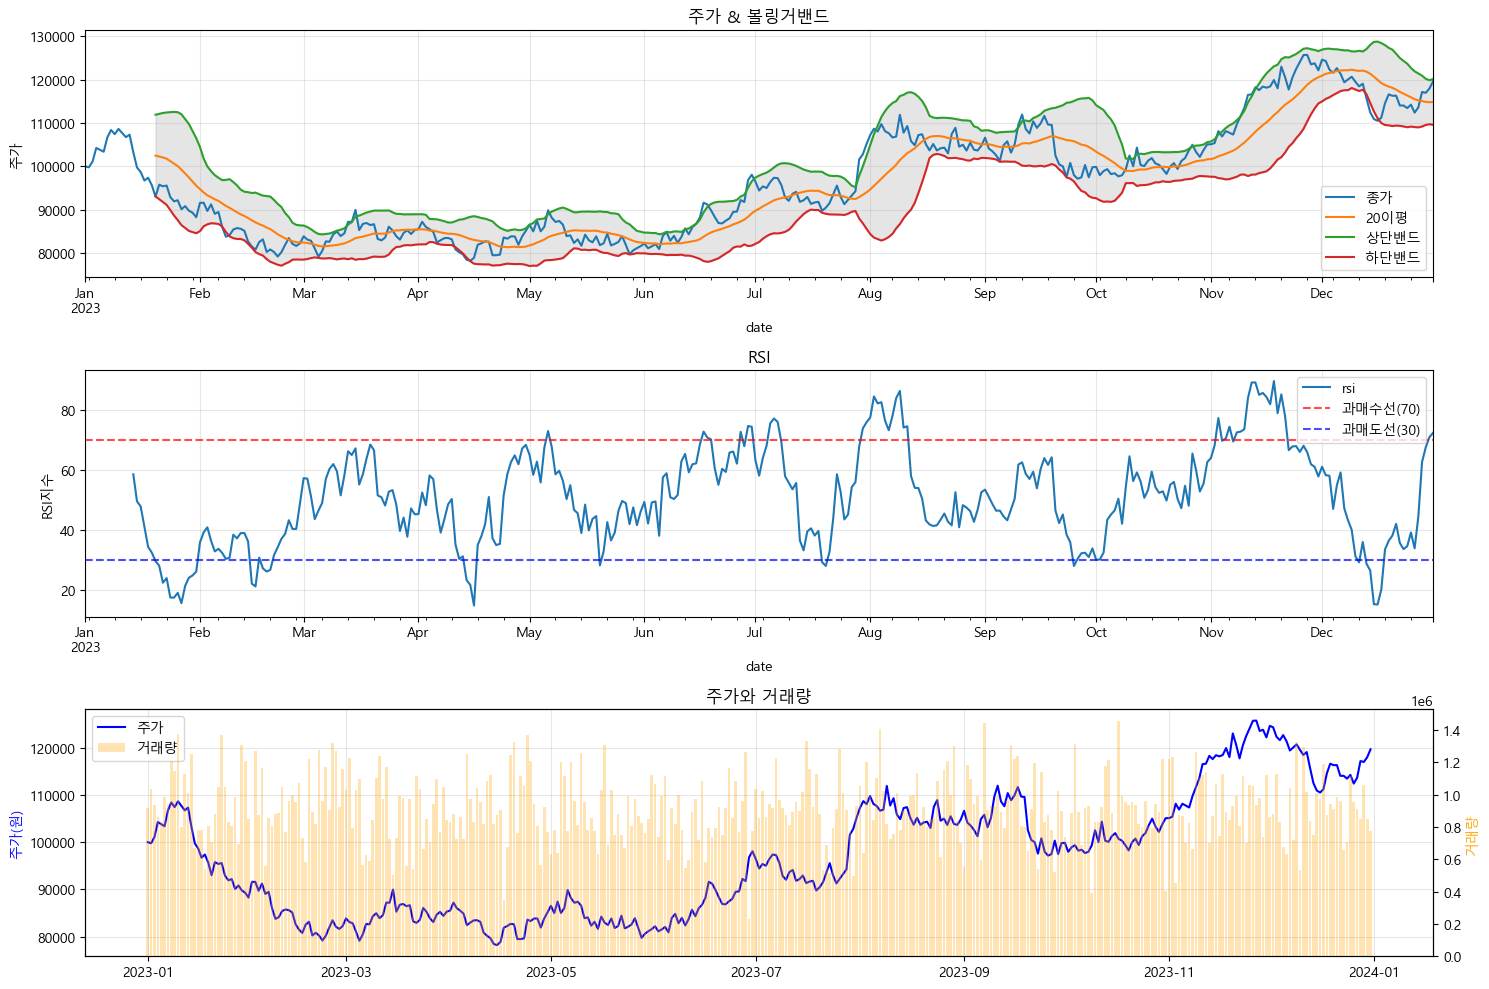

In [24]:
# 기술 분석 차트
plt.figure(figsize=(15, 10))

# 볼링거 밴드 & 주가
plt.subplot(3, 1, 1)
# df.plot => plt.figure() 를 실행함. 기존의 캔버스 내부의 subplot으로 만드는 코드
ax = plt.gca()
df[['close', 'ma_20', 'bb_upper', 'bb_lower']].plot(ax=ax)
plt.fill_between(
    df.index,
    df['bb_upper'],
    df['bb_lower'],
    alpha=0.2, color='gray'
)
plt.legend(['종가', '20이평', '상단밴드', '하단밴드'])
plt.title('주가 & 볼링거밴드')
plt.ylabel('주가')
plt.grid(True, alpha=0.3)

# RSI
plt.subplot(3, 1, 2)
df['rsi'].plot()
plt.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='과매수선(70)')
plt.axhline(y=30, color='blue', linestyle='--', alpha=0.7, label='과매도선(30)')
plt.title('RSI')
plt.ylabel('RSI지수')
plt.legend()
plt.grid(True, alpha=0.3)

# 거래량 <-> 가격 (다른 형태의 그래프를 중첩해서 시각화)
plt.subplot(3, 1, 3)
# 축을 직접 정의하고 그림
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(df.index, df['close'], '-b', label='주가')  # -실선, b파랑
ax2.bar(df.index, df['volume'], alpha=0.3, color='orange', label='거래량')
ax1.set_ylabel('주가(원)', color='b')
ax2.set_ylabel('거래량', color='orange')
ax1.set_title('주가와 거래량')
ax1.grid(True, alpha=0.3)

# 범례 결합
line1, label1 = ax1.get_legend_handles_labels()
line2, label2 = ax2.get_legend_handles_labels()
ax1.legend(line1 + line2, label1 + label2, loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
# 수익률 분석

# 누적 수익률
# 마지막날 종가
cum_return = (df['close'].iloc[-1] / df['close'].iloc[0] -1) * 100
print(f'2023 총 수익률: {cum_return:.2f}%')

# 변동성 분석 - (1년간 수익률이 얼마나 요동칠 가능성이 있는가) -> 높다: HRHR, 낮다: LRLR
annual_volatility = df['returns'].std() * np.sqrt(252) * 100
print(f'연율화 변동성: {annual_volatility:.2f}%')

# 샤프 비율 (무위험 수익률을 3% 가정) -> 높을수록 Low Risk - High Risk
risk_free_rate = 0.03  # 은행예금
# 기대수익률 - 무위험수익률
sharpe_ratio = (df['returns'].mean() * 252 - risk_free_rate) / (df['returns'].std() * np.sqrt(252))
print(f'샤프 비율: {sharpe_ratio:.3f}%')

# 최대 낙폭 (Maximum Drawdown) - 최고점 대비 얼마나 떨어졌나
cum_wealth = (1 + df['returns']).cumprod()
running_max = cum_wealth.expanding().max()
drawdown = (cum_wealth - running_max) / running_max
mdd = drawdown.min() * 100 
print(f'최대 낙폭: {mdd:.2f}%')

# 월별 성과 요약
monthly_perf = df['close'].resample('ME').last().pct_change().dropna() * 100
print(f'월별 평균 수익률: {monthly_perf.mean():.2f}')
print(f'월별 수익률 변동성: {monthly_perf.std():.2f}')
print(f'양의 수익률 월수: {(monthly_perf > 0).sum()} 개월 / {len(monthly_perf)} 개월')

2023 총 수익률: 19.65%
연율화 변동성: 30.09%
샤프 비율: 0.462%
최대 낙폭: -27.99%
월별 평균 수익률: 3.12
월별 수익률 변동성: 8.67
양의 수익률 월수: 5 개월 / 11 개월


            close  volume  volatility  returns
close       1.000   0.047      -0.148    0.098
volume      0.047   1.000      -0.038   -0.078
volatility -0.148  -0.038       1.000   -0.061
returns     0.098  -0.078      -0.061    1.000


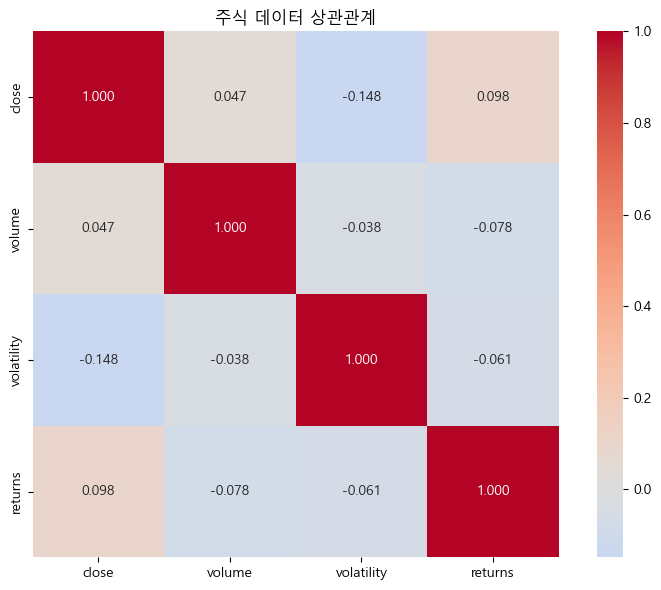

In [32]:
# 상관관계(correlation) - 가격, 거래량, 변동성
corr_matrix = df[['close', 'volume', 'volatility', 'returns']].corr()
print(corr_matrix.round(3))
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.3f'
)
plt.title('주식 데이터 상관관계')
plt.tight_layout()
plt.show()